# Lab 3: CNNs and Deep Learning 
**(version 1.0)**

### TBMI26/732A55 Neural Networks and Learning Systems 2020
### Michael Felsberg
---

#### *Hint: Use the provided test cases to check if your solutions are valid.*

---
## 2D Convolution
It is widely used with 2D signals such as images. For the further steps, we often need to visualize an image and we define a shortcut for that:

In [173]:
import numpy as np
from matplotlib import pyplot as plt
def visualize(img, title=''):
    plt.imshow(img,'gray')
    plt.colorbar()
    plt.title(title)
    plt.show()
    print('Image size:', img.shape)

---
**Task 1:** Convolution can be performed in 2D using the function `scipy.signal.convolove2d()`. Use this function to generate a 2D kernel of size $33\times33$ by five times cascading 2D convolutions of $H$ with itself, starting with $H = \begin{array}{|c|c|}
      \hline
      1 & 1 \\
      \hline
      1 & 1 \\
      \hline
    \end{array}/4$.   
*Visualize* the kernel using `visualize` function defined above.   

[[5.42101086e-20 1.73472348e-18 2.68882139e-17 ... 2.68882139e-17
  1.73472348e-18 5.42101086e-20]
 [1.73472348e-18 5.55111512e-17 8.60422844e-16 ... 8.60422844e-16
  5.55111512e-17 1.73472348e-18]
 [2.68882139e-17 8.60422844e-16 1.33365541e-14 ... 1.33365541e-14
  8.60422844e-16 2.68882139e-17]
 ...
 [2.68882139e-17 8.60422844e-16 1.33365541e-14 ... 1.33365541e-14
  8.60422844e-16 2.68882139e-17]
 [1.73472348e-18 5.55111512e-17 8.60422844e-16 ... 8.60422844e-16
  5.55111512e-17 1.73472348e-18]
 [5.42101086e-20 1.73472348e-18 2.68882139e-17 ... 2.68882139e-17
  1.73472348e-18 5.42101086e-20]]


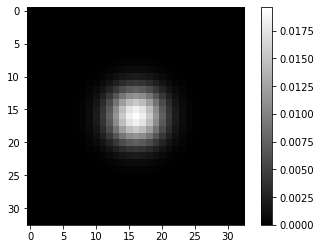

Image size: (33, 33)


In [174]:
# YOUR CODE HERE
import scipy
H = np.array([[1/4, 1/4],[1/4, 1/4]])
for i in range(5):
    H = scipy.signal.convolve2d(H,H)

print(H)
visualize(H)

In [175]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(H.sum().round()==1)

---
**Task 2:** Now, load the image `'MR15^044.JPG'` (a sample from ImageNet), **sum** its RGB-channels, **normalize** it to the range [0,1], and convolve it with $H$ from task 3 under the options `'valid'` and `'same'`. 

What differences do you observe regarding the size of the output?

The size of the input increases as 

61008
183024


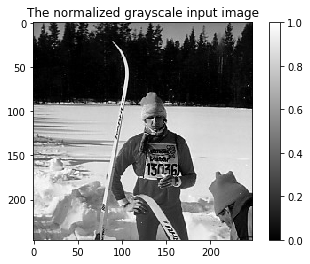

Image size: (246, 248)


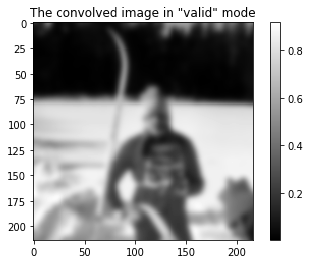

Image size: (214, 216)


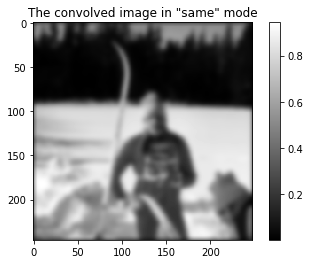

Image size: (246, 248)


In [176]:
# YOUR CODE HERE
def gray(rgb):
    graypic = np.dot(rgb[...,:3], [0.2126, 0.7152, 0.0722]) #Wikipedia numbers
    return graypic
img = plt.imread("MR15^044.JPG")
img_gray = gray(img)
img_gray = img_gray / img_gray.max()
print(img_gray.size)
print(img.size) #3times the size
omg_sc_valid = scipy.signal.convolve2d(img_gray,H,mode = 'valid')
omg_sc_same = scipy.signal.convolve2d(img_gray,H,mode = 'same')
visualize(img_gray, 'The normalized grayscale input image')      
visualize(omg_sc_valid, 'The convolved image in "valid" mode')
visualize(omg_sc_same, 'The convolved image in "same" mode')

In [177]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(img_gray.max() == 1.0)
assert(omg_sc_valid.shape == (214, 216))
assert(omg_sc_same.shape == (246, 248))

---
## Strided convolution

In strided convolution, samples are removed based on the stride. According to the Nyquist theorem, this can generate aliasing artifacts.  

**Task 3:** Visualize the input image and the second output image from task 4, `omg_sc_same`, while only keping every *fifth* row and column. 

*Hint*: Use Python extended slicing, read this guid on [extended slices](https://docs.python.org/2.3/whatsnew/section-slices.html)


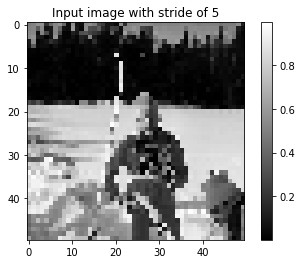

Image size: (50, 50)


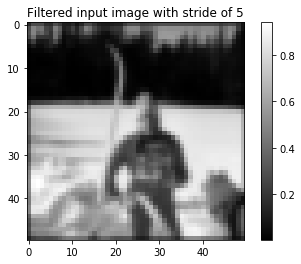

Image size: (50, 50)


In [178]:
# YOUR CODE HERE
def slicer(img,n):
    img = img[::n]
    img = img[:,::n]
    return img
img_gray_ds = slicer(img_gray,5)
omg_sc_same_ds = slicer(omg_sc_same,5)
visualize(img_gray_ds, 'Input image with stride of 5')
visualize(omg_sc_same_ds, 'Filtered input image with stride of 5')

What do you observe, in particular at the ski?

The non-filtered ski is very blocky.
If one is asked to recognise if there's a ski in the image it's more likely to be detected if filtering (performing convolutions) is done. 

## Convolution in PyTorch
PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing. It is primarily developed by Facebook's AI Research lab.

We will start by utilizing PyTorch to perform convolution operations in 2D.

---
**Task 4:** Apply the cascaded $33\times33$ filter from task 1 to the image using a `torch.nn.Conv2d` layer. 

Compare the results from *Scipy* in task 2 and *PyTorch* in this task by subtracting the output images.

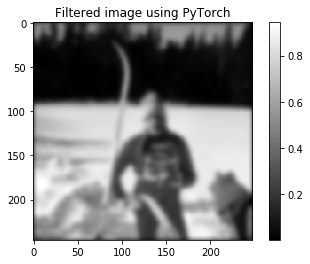

Image size: (246, 248)


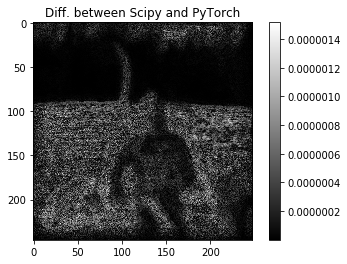

Image size: (246, 248)


In [179]:
# YOUR CODE HERE
import torch.nn as nn
#input layers 1 grå output 1 grå dimension på layer 33, padding = ??
conv = nn.Conv2d(1,1,33,padding = 16, bias = False)
conv.weight.data[0,0,:,:] = torch.tensor(H) 
out_2d_np=conv(torch.tensor(img_gray).unsqueeze(0).unsqueeze(0).float())
out_2d_np=out_2d_np.detach().numpy().squeeze(0).squeeze(0)
# Hint: Convert the output tensor to numpy array
visualize(out_2d_np, 'Filtered image using PyTorch') 
diff = np.abs(out_2d_np-omg_sc_same)
visualize(diff, 'Diff. between Scipy and PyTorch')


In [180]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(diff.mean()<1e-7)

AssertionError: 

---
**Task 5:** Repeat the previous task with stride 5. Compare with `omg_sc_same_ds` from task 3.

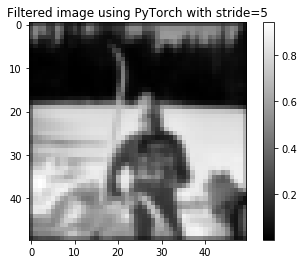

Image size: (50, 50)
2.1652116711854928e-07


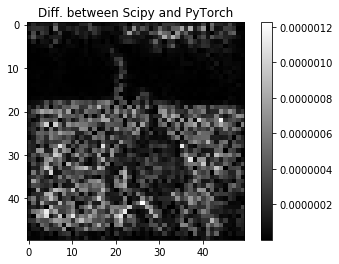

Image size: (50, 50)


In [181]:
# YOUR CODE HERE
conv = nn.Conv2d(1,1,33,padding = 16, bias = False, stride = 5)
conv.weight.data[0,0,:,:] = torch.tensor(H) 
out_2d_s5_np=conv(torch.tensor(img_gray).unsqueeze(0).unsqueeze(0).float())
out_2d_s5_np=out_2d_s5_np.detach().numpy().squeeze(0).squeeze(0)
# Hint: Convert the output tensor to numpy array
visualize(out_2d_s5_np, 'Filtered image using PyTorch with stride=5') 
diff_s5 = np.abs(out_2d_s5_np-omg_sc_same_ds)
print(diff_s5.mean())
visualize(diff_s5, 'Diff. between Scipy and PyTorch')

In [182]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(diff_s5.mean()<1e-6)

---
**Task 6:** Repeat task 5 with stride of 5 and a $1\times1$ filter. Compare with `img_gray_ds` from task 3.

1


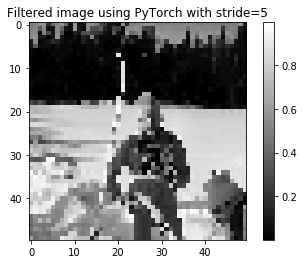

Image size: (50, 50)
8.360165779709542e-09


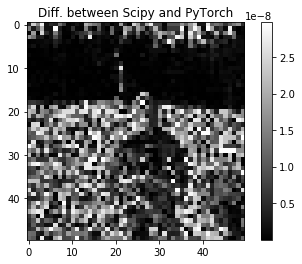

Image size: (50, 50)


In [183]:
# YOUR CODE HERE
conv = nn.Conv2d(1,1,1,padding = 0, bias = False, stride = 5)
H_new = np.array(1)
print(H_new)
conv.weight.data[0,0,:,:] = torch.tensor(H_new) 
out_2d_s5_1_np=conv(torch.tensor(img_gray).unsqueeze(0).unsqueeze(0).float())
out_2d_s5_1_np=out_2d_s5_1_np.detach().numpy().squeeze(0).squeeze(0)

# Hint: Convert the output tensor to numpy array
visualize(out_2d_s5_1_np, 'Filtered image using PyTorch with stride=5') 
diff_s5_1 = np.abs(out_2d_s5_1_np-img_gray_ds)
print(diff_s5_1.mean())
visualize(diff_s5_1, 'Diff. between Scipy and PyTorch')

In [184]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(diff_s5_1.mean()<1e-7)

---
## Training a PyTorch Convolution layer

Now, we want the network to learn the convolution filter given the input and the filtered output.

**Task 7:** Considering the input image tensor `inp_2d` from task 4 as a *batch* and the filtered output `out_2d_t` as a label, use `torch.optim.SGD` to learn the the filter $H$.

**Hints**:
- Use the L1 loss from `torch.nn.functional.l1_loss`.
- Use a small learning rate.
- Detach `out_2d_t` from the model graph in task 4 to avoid errors.
- Iterate for 500 iterations.
- Clip the weights after each iteration to $[0, \infty[$ for stable convergence.
- Print the loss every 100 steps.

torch.Size([1, 1, 246, 248])
0.11390864849090576
0.05877495929598808
0.028182171285152435
0.011777031235396862


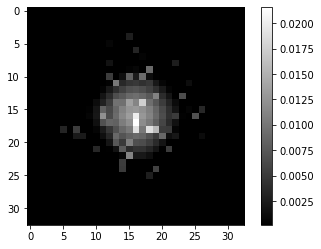

Image size: (33, 33)


In [191]:
# Define the model and the optimizer
# YOUR CODE HERE
import torch.optim as optim
inp_2d = torch.tensor(img_gray).unsqueeze(0).unsqueeze(0).float()
out_2d_t = torch.tensor(out_2d_np).unsqueeze(0).unsqueeze(0).float()
print(out_2d_t.shape)
model_1layer = nn.Conv2d(1,1,33,padding = 16, bias = False)
optimizer = optim.SGD(model_1layer.parameters(), lr=0.0005)
for i in range(500):
    optimizer.zero_grad()
    output = model_1layer(inp_2d)
    loss = torch.nn.functional.l1_loss(output, out_2d_t)
    loss.backward()
    optimizer.step()    # Does the update
    if (i == 100 or i == 200 or i == 300 or i == 400 or i == 500):
        print(loss.item())
    model_1layer.weight.data.clamp_(0)
    
# Visualize the trained filter
visualize(model_1layer.weight[0,0,:,:].detach().cpu().numpy())

**Task 8**:
To make the transitiong to the next task easier, redo task 7 by defining a custom PyTorch module which includes only 1 convolution layer.  
You can follow this [tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#define-the-network).  
A custom module class inherits `torch.nn.Module` class and needs to have two mandatory functions:
- `__init__(self):` where you define layers included in your module.
- `forward(self, x):` where you define the inference steps of your network.

The built-in auto-differentiation module in PyTorch will keep track of the operations that you perform in the inference steps and calculates their derivatives when you back-propagate the loss function during training.

In [34]:
# YOUR CODE HERE
raise NotImplementedError()

# Visualize the trained filter
visualize(net.conv1.weight[0,0,:,:].detach().cpu().numpy())
        

NotImplementedError: 

---
## Training a whole network
So far, we have experimented with training a single convolution layer. Now we try to train a whole network to perform the task of image classification on CIFAR-10 dataset.  
But first, make sure that CUDA is available by running the following command:

In [35]:
import torch
print("CUDA Available: ",torch.cuda.is_available())

CUDA Available:  False


**Task 9:** We will train on CIFAR10, which is readily available at `torchvision.datasets.CIFAR10`. 

Create a dataloader for the *training* and the *test* sets of CIFAR10 using `torch.utils.data.DataLoader` , then show some examples from the training set using `torchvision.utils.make_grid` and print out their labels. 

*Hints* :
- The `imshow` function for visualizing the images is provided below.
- Use `torchvision.transforms` to perform whitening on images (normalization using the mean and the standard deviation).
- Use a batch size of 64.

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img * 0.2 + 0.5  # Un-Normalize, Change according to your normalization
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    return npimg.mean()

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# YOUR CODE HERE
raise NotImplementedError()

# Show some random images
dataiter = iter(trainloader)
images, labels = dataiter.next()
grid_img = torchvision.utils.make_grid(images)
imshow(grid_img)

# Print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

NotImplementedError: 

In [ ]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(grid_img.std()>0.8)

---
## Baseline Model
**Task 10:** Build the depicted LeNet5-inspired model using PyTorch standard components. Assume a **padding** with `same` mode for all convolution layers.   
Try to figure out the missing dimension at the first fully connected layer.
![architecture](arch.png)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()        
        
        # Define the network
        # YOUR CODE HERE
        raise NotImplementedError()
        
    def forward(self, x):
        # Perform Inference            
        # YOUR CODE HERE
        raise NotImplementedError()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = LeNet5().to(device)

---
**Task 11:** Train the LeNet5 model for 40 epochs using a suitable batch size and display the result.

*Hints*:
- Define an optimizer, e.g. SGD optimizer.
- Define a suitable loss function.
- Iterate for 40 epochs and at each epoch calculate a running loss and accuracy on the training set.
- After each epoch, evaluate the model on the test set. You can achieve this by **completing** the `test` function below that performs *only* inference on the test set and calculates the accuracy.

In [ ]:
# A function to plot the accuracy training history
def plot_model_history(history):
    plt.figure(0)
    plt.plot(history['train'],'r', lw=3)
    plt.plot(history['test'],'b', lw=3)
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Epoch number")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Test Accuracy")
    plt.legend(['Training','Test'])
    plt.grid(True)

# Test function that runs only inference
def test(model, testloader):
    correct = 0
    total = 0
    # YOUR CODE HERE
    raise NotImplementedError()
    print('Test Accuracy: %d %%' % (100 * correct / total))
    return correct / total

In [ ]:
NUM_EPOCHS = 40
LR = 0.01

# Define a proper optimizer and a proper loss function
# YOUR CODE HERE
raise NotImplementedError()

acc_history = {'train':[], 'test':[]}

# Iterate for N epochs
# YOUR CODE HERE
raise NotImplementedError()

print('Finished Training!')

plot_model_history(acc_history)

# Let's quickly save our trained model:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## == MANDATORY QUESTIONS END HERE ==

---

### Baseline + Decaying Learning Rate
In most papers, the learning rate is successively reduced in order to boost the final performance, e.g. divided by two after 20 and 30 epochs.  
**[EXTRA]**
**Task 12:** Define a suitable function and train the previous model with decaying learning rate. Plot the result and compare it to the baseline.

In [ ]:
def adjust_learning_rate(optimizer, epoch):    
    for param_group in optimizer.param_groups:
        lrate = param_group["lr"]
        # YOUR CODE HERE
        raise NotImplementedError()

In [ ]:
net_lr = LeNet5().to(device)

# Define a proper optimizer and a proper loss function
# YOUR CODE HERE
raise NotImplementedError()

acc_history_lr = {'train':[], 'test':[]}
# Iterate for N epochs
# YOUR CODE HERE
raise NotImplementedError()
print('Finished Training!')

plot_model_history(acc_history_lr)

# Let's quickly save our trained model:
PATH = './cifar_net_lr.pth'
torch.save(net_lr.state_dict(), PATH)

---
### Baseline +  Decaying Learning rate + Data Augmentation 
**[EXTRA]**
**Task 13:** Data augmentation is known to reduce overfitting. Use `torchvision.transforms`to perform additional augmentation with flipping and random cropping. Adjust the number of epochs and the learning rate schedule if needed. What do you observe?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:

net_lr_wr_aug = LeNet5().to(device)

# Define a proper optimizer and a proper loss function
# YOUR CODE HERE
raise NotImplementedError()

acc_history_lr_wr_aug = {'train':[], 'test':[]}
# Iterate for N epochs
# YOUR CODE HERE
raise NotImplementedError()
print('Finished Training!')

plot_model_history(acc_history_lr_wr_aug)

# Let's quickly save our trained model:
PATH = './cifar_net_lr_wr_aug.pth'
torch.save(net_lr_wr_aug.state_dict(), PATH)